In [173]:
import torch
import matplotlib.pyplot as plt

In [174]:
# 1. Create a range of input values in 2D
n_steps = 200
# Get a set of 2D points covering the unit square:
x = torch.linspace(-10, 10, n_steps)
y = torch.linspace(-10, 10, n_steps)
# Create a grid of points:
X, Y = torch.meshgrid(x, y, indexing='ij')
# Flatten the grid to get a list of 2D points:
points = torch.stack([X.flatten(), Y.flatten()], dim=1)
hidden_dim = 40

In [175]:
# Define a layer of the network with a randomly initialized weight vector:
w_layer1 = torch.randn(2, hidden_dim)
# Define biases:
b_layer1 = torch.randn(hidden_dim)

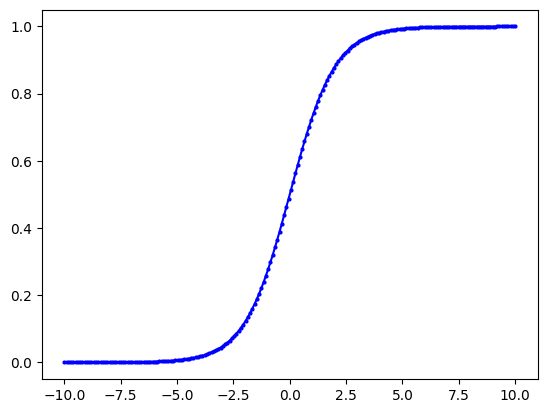

In [176]:
def activation(x):
    # step function:
    # return torch.heaviside(x, torch.tensor([0.0]))
    # return torch.relu(x)
    return torch.sigmoid(x)

# plot the activation function:
plt.plot(x.numpy(), activation(x).numpy(), 'bo-', markersize=2)

In [177]:
# Pass the input through the layer:
out_layer1 = torch.matmul(points, w_layer1) + b_layer1
# Apply a non-linear activation function:
out_layer1 = activation(out_layer1)
out_layer1.shape

torch.Size([40000, 40])

In [178]:
# Define weights for second layer:
w_layer2 = torch.randn(hidden_dim, 1)
# Define biases:
b_layer2 = torch.randn(1)

In [179]:
# Pass the output of the first layer through the second layer:
out_layer2 = torch.matmul(out_layer1, w_layer2) + b_layer2
# Apply a non-linear activation function:
out_layer2 = activation(out_layer2)

Text(0, 0.5, 'y')

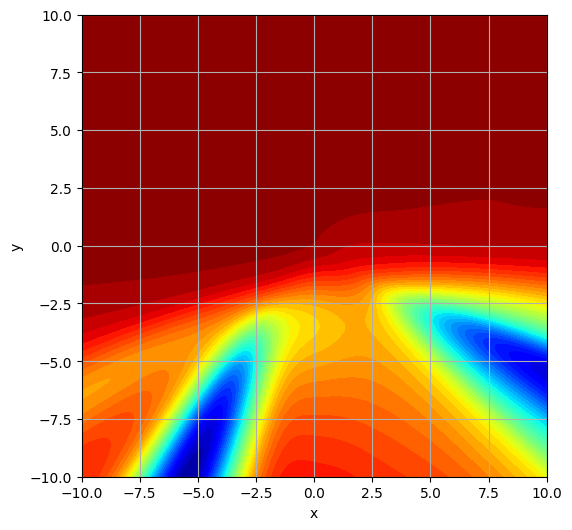

In [180]:
plt.figure(figsize=(6, 6))
z = out_layer2
# Plot xy, and z as a color:
# plt.scatter(points[:, 0], points[:, 1], c=z[:, 0])
# use interpolation:
plt.contourf(X, Y, z.reshape(X.shape), 50, cmap='jet')

plt.grid()
plt.xlabel('x')
plt.ylabel('y')

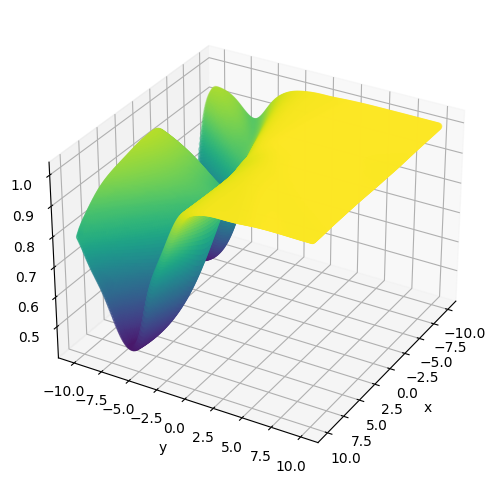

In [181]:
# Plot x,y,z on a 3D plot:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], z[:, 0], c=z[:, 0])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
# Rotate the plot:
ax.view_init(30, 30)